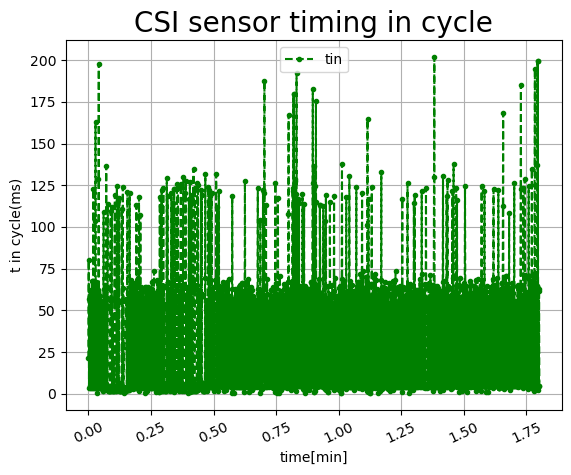

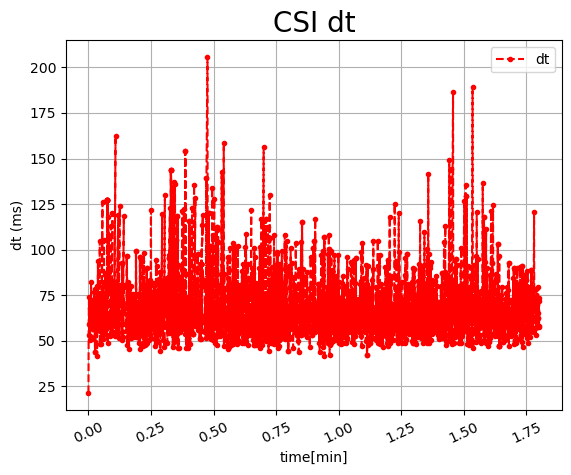

In [95]:
import matplotlib.pyplot as plt
import csv
import numpy as np

NS = 1   # Number of Sensors
NS = 2
#NS = 6

if NS==1: file_in = '20jan23exp211_5_5.csv';   N10s = 50   # # frames in 10 s => Ts NN
if NS==2: file_in = '20jan23exp221_5_12.csv';  N10s = 60   #120 CSI Lines 
if NS==2: file_in = '20janExp2_221_5_12.csv';  N10s = 60   #120 CSI Lines 
if NS==2: file_in = '21janExp2_221_5_10.csv';  N10s = 158   #158 CSI Lines == 10 s 
if NS==2: file_in = '23jan_221_5_10.csv';  N10s = 158   #158 CSI Lines == 10 s 
if NS==2: file_in = 'f24janII_221_5_10.csv';  N10s = 158   #158 CSI Lines == 10 s 
if NS==2: file_in = 'f26jan221_5_10.csv';  N10s = 158   #158 CSI Lines == 10 s 
if NS==6: file_in = 'f19jan23exp261_6_60.csv';  N10s = 86   # 84/6 CSI Lines => Ts = 10 ms 


t = []
tin = []
dt=[]
s=[]
tCSI1=[]
tCSI2=[]

with open(file_in,'r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')   
    for row in lines:
        t.append(float(row[13]))
        tin.append(float(row[15]))
        dt.append(float(row[14]))
        s.append(float(row[1]))
        tCSI1.append(float(row[10]))
        tCSI2.append(float(row[11]))


t=np.array(t)*0.001/60
plt.plot(t,tin, color = 'g', linestyle = 'dashed',
         marker = '.',label = "tin")
plt.xticks(rotation = 25)
plt.xlabel('time[min]')
plt.ylabel('t in cycle(ms)')
plt.title('CSI sensor timing in cycle', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

plt.plot(t,dt, color = 'r', linestyle = 'dashed',
         marker = '.',label = "dt")  
plt.xticks(rotation = 25)
plt.xlabel('time[min]')
plt.ylabel('dt (ms)')
plt.title('CSI dt', fontsize = 20)
plt.grid()
plt.legend()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1789
(1788,)


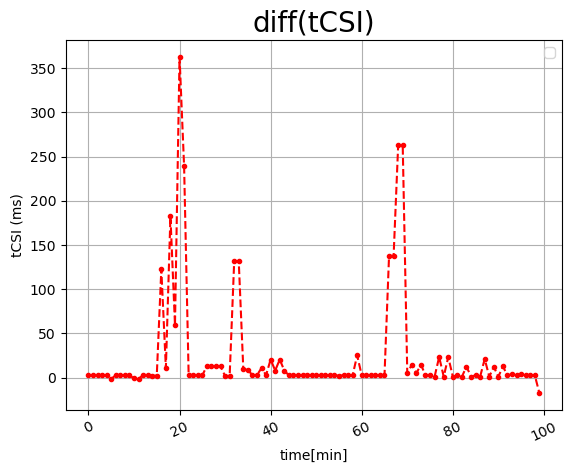

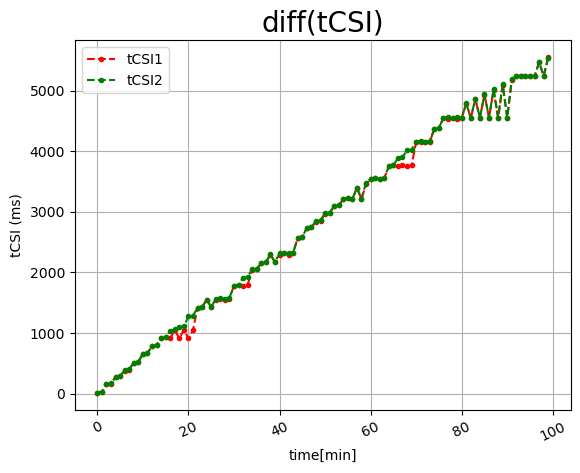

In [100]:
def df(x):
    for i in range (len(x)-1):
        y[i] = x[i+1]-x[i]
    return y

n=len(tCSI1)
print(n)
y1=np.array(tCSI1)
y2=np.array(tCSI2)
y1=y1[:-1]
y2=y2[:-1]

print(y1.shape)
#y1=df(y1)
#y2=df(y2)

i=0
f=100


diff=np.array(tCSI2[0:n])-np.array(tCSI1[0:n])
plt.plot(diff[i:f], color='r',linestyle = 'dashed',
         marker = '.')  
#plt.plot(tCSI2[0:n], linestyle = 'dashed',
#         marker ='.', color='g')  
plt.xticks(rotation = 25)
plt.xlabel('time[min]')
plt.ylabel('tCSI (ms)')
plt.title('diff(tCSI)', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

plt.plot(tCSI1[i:f],linestyle = 'dashed',marker = '.',color='r',label='tCSI1')  
plt.plot(tCSI2[i:f], linestyle = 'dashed',marker ='.', color='g',label='tCSI2')  
plt.xticks(rotation = 25)
plt.xlabel('time[min]')
plt.ylabel('tCSI (ms)')
plt.title('diff(tCSI)', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

t1=np.array(tCSI1)
t2=np.array(tCSI2)

for i in range(len(t1)-1):
    if t1[i] == t1[i+1]:
        print('t1',i,tCSI1[i])
    if t2[i] == t2[i+1]:
        print('t2',i,tCSI2[i])
    

1789


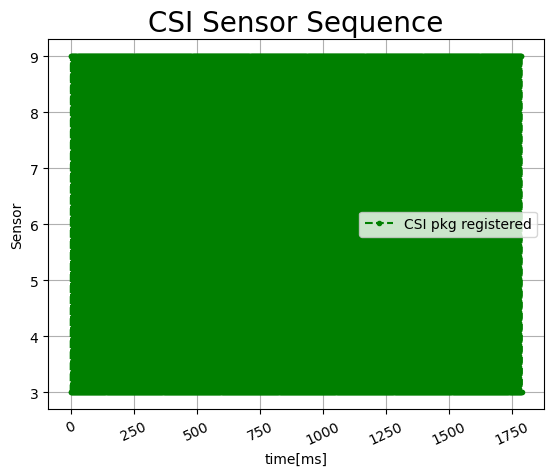

In [101]:
print(len(s))
plt.plot(s, color = 'g', linestyle = 'dashed', 
         marker = '.',label = "CSI pkg registered")

plt.xticks(rotation = 25)
plt.xlabel('time[ms]')
plt.ylabel('Sensor')
plt.title('CSI Sensor Sequence', fontsize = 20)
plt.grid()
plt.legend()
plt.show()
  

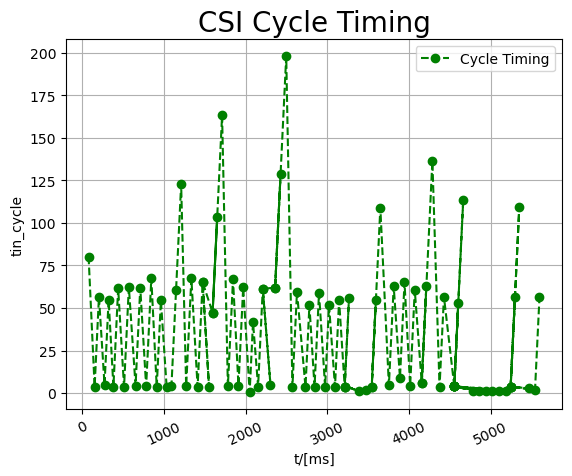

1206 is the number of lines in the .csv...
(1788,) (1788,) ()
1788
0


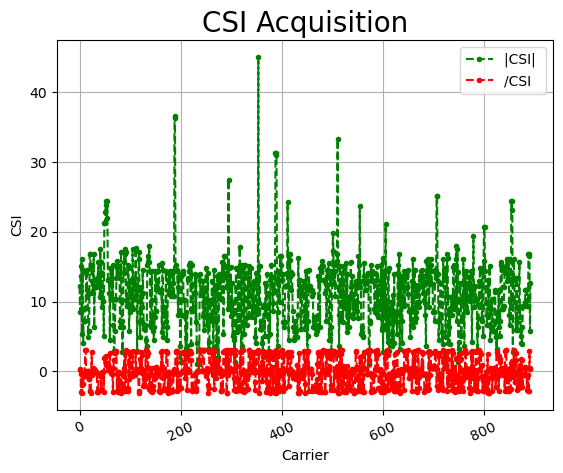

In [102]:
import matplotlib.pyplot as plt
import csv
import pandas
import numpy as np
import math
import cmath

x = []
y = []
    
data=np.genfromtxt(file_in,dtype=float,delimiter=',',skip_header=1)

x=data[:,13]
y=data[:,15]
#for i in range(5):
#    yv=[yv data[i]]

plt.plot( x[0:100],y[0:100], color = 'g', linestyle = 'dashed',
         marker = 'o',label = "Cycle Timing")
  
plt.xticks(rotation = 25)
plt.xlabel('t/[ms]')
plt.ylabel('tin_cycle')
plt.title('CSI Cycle Timing', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

################################################

ya= []
yp= []
yv=data[:,17]

cv=np.array(yv)
cv=cv.flatten()            # 1080 CSI values => 1 line of CSI image

print("1206 is the number of lines in the .csv...") 
print(cv.shape,yv.shape,yv[0].shape)
#print(cv.shape,len(cv),len(cv)/6)

#cv=cv[0:216]
par = len(cv)
print(len(cv))
print(len(cv) - 2*round(len(cv)/2))

if len(cv) - 2*round(len(cv)/2) == 1 : 
    print(len(cv))
    cv=cv[:-1];
    print(len(cv))
    
for i in range (0, len(cv), 2):
    ya.append(math.sqrt(cv[i]**2 + cv[i+1]**2))
    yp.append(cmath.phase(complex(cv[i],cv[i+1])))

#ys=y[6].split(",")
  
plt.plot( ya, color = 'g', linestyle = 'dashed',
         marker = '.',label = "|CSI| ")
plt.plot( yp, color = 'r', linestyle = 'dashed',
         marker = '.',label = "/CSI ")
  
plt.xticks(rotation = 25)
plt.xlabel('Carrier')
plt.ylabel('CSI')
plt.title('CSI Acquisition', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

In [103]:
print(y)
print(cv)
print(len(cv))

[80.2    3.637 56.595 ...  4.875 62.702  4.407]
[12.  2.  8. ...  3. 12.  4.]
1788
